<a href="https://colab.research.google.com/github/thantzintun232/AI-for-Indoor-Air-Quality-Forecasting/blob/main/NTLL_Data_Preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

excel_folder = "/content/drive/MyDrive/Colab Notebooks/Dissertation/Headlingley One Month Data"


columns = [
    'timestamp', 'installation_name', 'installation_site',
    'temp_aq', 'humidity_aq', 'co2_gas', 'pm2_5', 'voc_aq'
]

files = sorted([f for f in os.listdir(excel_folder) if f.endswith(".xlsx")])
dfs = []

for file in files:
    path = os.path.join(excel_folder, file)
    df = pd.read_excel(path, usecols=lambda x: x in columns)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', errors='coerce')
    df['source_file'] = file
    dfs.append(df)

full_df = pd.concat(dfs, ignore_index=True)

print("First 5 rows:\n", full_df.head())
print("Last 5 rows:\n", full_df.tail())

First 5 rows:
                   installation_name  installation_site           timestamp  \
0  External - front of James Graham  Headingley Campus 2025-03-01 00:04:58   
1  External - front of James Graham  Headingley Campus 2025-03-01 00:09:58   
2  External - front of James Graham  Headingley Campus 2025-03-01 00:14:58   
3  External - front of James Graham  Headingley Campus 2025-03-01 00:19:58   
4  External - front of James Graham  Headingley Campus 2025-03-01 00:24:58   

       pm2_5   temp_aq  humidity_aq  voc_aq  co2_gas      source_file  
0  24.091326  3.039062    76.490273   231.0    688.0  2025-03-01.xlsx  
1  24.192556  2.796875    76.534142   236.0    713.0  2025-03-01.xlsx  
2  27.032080  2.507812    77.245590   244.0    723.0  2025-03-01.xlsx  
3  24.356184  2.273438    80.606392   228.0    633.0  2025-03-01.xlsx  
4  25.001141  2.281250    79.978867   223.0    660.0  2025-03-01.xlsx  
Last 5 rows:
       installation_name  installation_site           timestamp     pm2

In [ ]:
print("Shape of full_df:", full_df.shape)

Shape of full_df: (74198, 9)


In [ ]:
missing_counts = full_df.isnull().sum()

missing_percent = (full_df.isnull().sum() / len(full_df) * 100).round(2)

missing_report = pd.DataFrame({'Missing': missing_counts,'Percent': missing_percent})
display(missing_report)

rows_with_nan = full_df.isnull().any(axis=1).sum()
print("Rows with at least one NaN value:", rows_with_nan)


,Missing,Percent
installation_name,0,0.00
installation_site,0,0.00
timestamp,0,0.00
pm2_5,1,0.00
temp_aq,6017,8.11
humidity_aq,6018,8.11
voc_aq,6018,8.11
co2_gas,1,0.00
source_file,0,0.00


Rows with at least one NaN value: 6020


In [ ]:
iaq_columns = ['temp_aq', 'humidity_aq', 'voc_aq', 'pm2_5', 'co2_gas']
full_df[iaq_columns] = full_df[iaq_columns].fillna(full_df[iaq_columns].mean())

missing_counts = full_df.isnull().sum()
missing_percent = (full_df.isnull().sum() / len(full_df) * 100).round(2)

missing_report_after = pd.DataFrame({
    'Missing': missing_counts,
    'Percent': missing_percent
})

display(missing_report_after)

rows_with_nan_after = full_df.isnull().any(axis=1).sum()
print("Rows with at least one NaN value (after imputation):", rows_with_nan_after)

,Missing,Percent
installation_name,0,0.0
installation_site,0,0.0
timestamp,0,0.0
pm2_5,0,0.0
temp_aq,0,0.0
humidity_aq,0,0.0
voc_aq,0,0.0
co2_gas,0,0.0
source_file,0,0.0


Rows with at least one NaN value (after imputation): 0


In [ ]:
from scipy.stats import zscore
import numpy as np

iaq_columns = ['temp_aq', 'humidity_aq', 'voc_aq', 'pm2_5', 'co2_gas']

z_df = pd.DataFrame(zscore(full_df[iaq_columns]), columns=iaq_columns)

outliers_before = (np.abs(z_df) > 3).sum()
print("Outliers before replacement:\n", outliers_before)

for col in iaq_columns:
    median_val = full_df[col].median()
    outlier_mask = np.abs(z_df[col]) > 3
    full_df.loc[outlier_mask, col] = median_val

z_df_after = pd.DataFrame(zscore(full_df[iaq_columns]), columns=iaq_columns)

outliers_after = (np.abs(z_df_after) > 3).sum()
print("\nOutliers after replacement:\n", outliers_after)



Outliers before replacement:
 temp_aq         555
humidity_aq     573
voc_aq         1964
pm2_5          2124
co2_gas        1948
dtype: int64

Outliers after replacement:
 temp_aq         454
humidity_aq     519
voc_aq         1362
pm2_5          2321
co2_gas        2425
dtype: int64


In [ ]:
full_df['date'] = full_df['timestamp'].dt.date
full_df['weekday'] = full_df['timestamp'].dt.day_name()
full_df['is_weekend'] = full_df['weekday'].isin(['Saturday', 'Sunday'])

print("Unique dates")
display(sorted(full_df['date'].unique()))

print("Counts for is_weekend column:")
display(full_df['is_weekend'].value_counts())

display(full_df.head())

Unique dates


[datetime.date(2025, 3, 1),
 datetime.date(2025, 3, 2),
 datetime.date(2025, 3, 3),
 datetime.date(2025, 3, 4),
 datetime.date(2025, 3, 5),
 datetime.date(2025, 3, 6),
 datetime.date(2025, 3, 7),
 datetime.date(2025, 3, 8),
 datetime.date(2025, 3, 9),
 datetime.date(2025, 3, 10),
 datetime.date(2025, 3, 11),
 datetime.date(2025, 3, 12),
 datetime.date(2025, 3, 13),
 datetime.date(2025, 3, 14),
 datetime.date(2025, 3, 15),
 datetime.date(2025, 3, 16),
 datetime.date(2025, 3, 17),
 datetime.date(2025, 3, 18),
 datetime.date(2025, 3, 19),
 datetime.date(2025, 3, 20),
 datetime.date(2025, 3, 21),
 datetime.date(2025, 3, 22),
 datetime.date(2025, 3, 23),
 datetime.date(2025, 3, 24),
 datetime.date(2025, 3, 25),
 datetime.date(2025, 3, 26),
 datetime.date(2025, 3, 27),
 datetime.date(2025, 3, 28),
 datetime.date(2025, 3, 29),
 datetime.date(2025, 3, 31),
 datetime.date(2025, 4, 1)]

Counts for is_weekend column:


,count
is_weekend,
False,51073
True,23125


,installation_name,installation_site,timestamp,pm2_5,temp_aq,humidity_aq,voc_aq,co2_gas,source_file,date,weekday,is_weekend
0,External - front of James Graham,Headingley Campus,2025-03-01 00:04:58,24.091326,3.039062,76.490273,231.0,688.0,2025-03-01.xlsx,2025-03-01,Saturday,True
1,External - front of James Graham,Headingley Campus,2025-03-01 00:09:58,24.192556,2.796875,76.534142,236.0,713.0,2025-03-01.xlsx,2025-03-01,Saturday,True
2,External - front of James Graham,Headingley Campus,2025-03-01 00:14:58,27.032080,2.507812,77.245590,244.0,723.0,2025-03-01.xlsx,2025-03-01,Saturday,True
3,External - front of James Graham,Headingley Campus,2025-03-01 00:19:58,24.356184,2.273438,80.606392,228.0,633.0,2025-03-01.xlsx,2025-03-01,Saturday,True
4,External - front of James Graham,Headingley Campus,2025-03-01 00:24:58,25.001141,2.281250,79.978867,223.0,660.0,2025-03-01.xlsx,2025-03-01,Saturday,True


# EDA

In [ ]:
display(full_df[iaq_columns].describe())

,temp_aq,humidity_aq,voc_aq,pm2_5,co2_gas
count,74198.000000,74198.000000,74198.000000,74198.000000,74198.000000
mean,18.707135,39.174403,118.264053,5.033148,556.201128
std,5.244968,14.109765,75.038766,6.264971,118.272075
min,2.187500,20.113909,1.000000,0.000000,130.000000
25%,18.109375,30.192968,65.000000,1.480000,488.000000
50%,19.945312,34.619991,109.000000,2.810000,529.000000
75%,22.070312,39.737011,145.000000,5.830000,577.000000
max,29.960938,83.625778,407.000000,39.470000,1102.000000


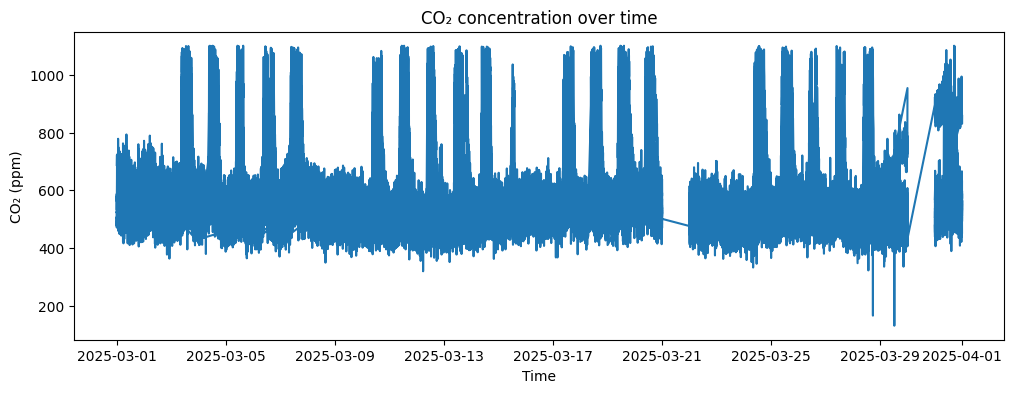

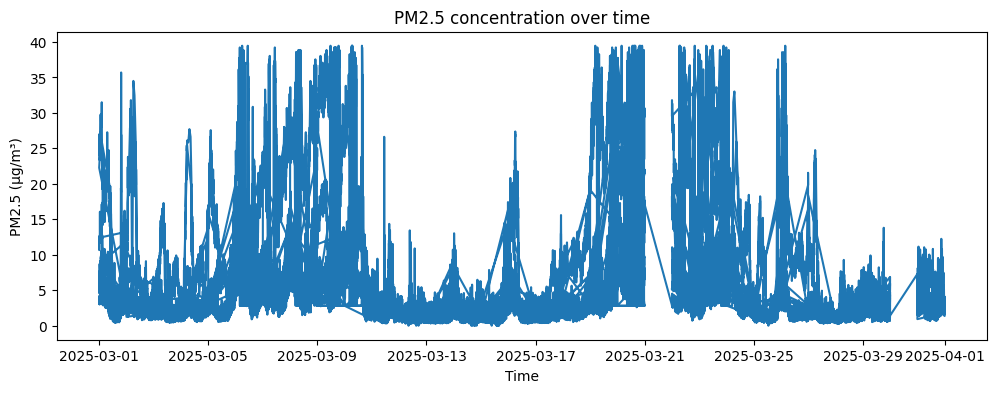

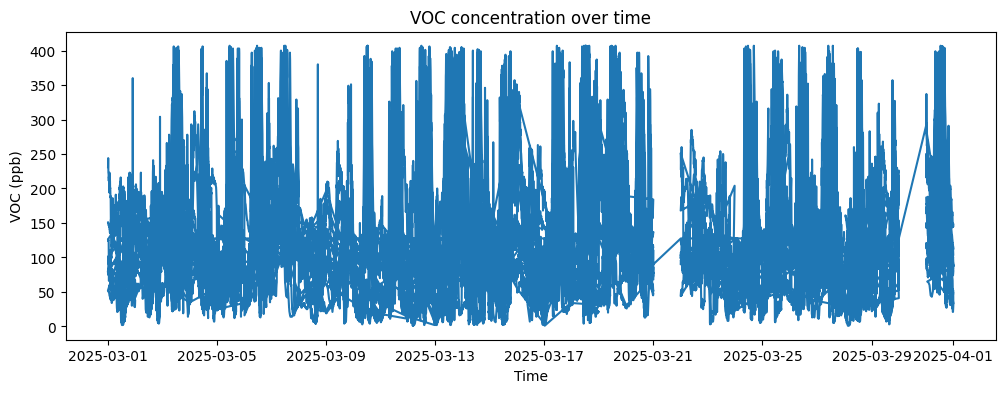

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(full_df['timestamp'], full_df['co2_gas'])
plt.title("CO₂ concentration over time")
plt.xlabel("Time")
plt.ylabel("CO₂ (ppm)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(full_df['timestamp'], full_df['pm2_5'])
plt.title("PM2.5 concentration over time")
plt.xlabel("Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(full_df['timestamp'], full_df['voc_aq'])
plt.title("VOC concentration over time")
plt.xlabel("Time")
plt.ylabel("VOC (ppb)")
plt.show()


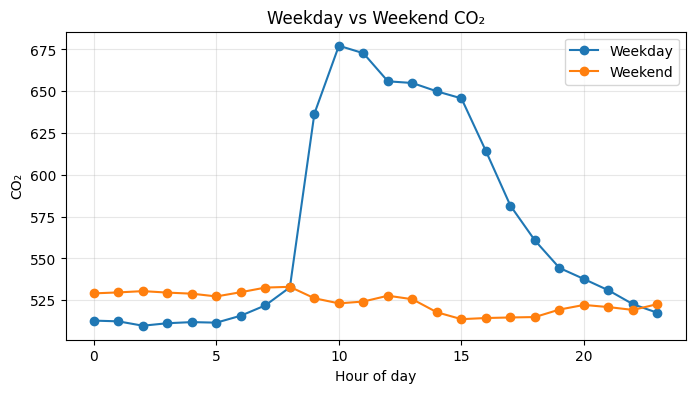

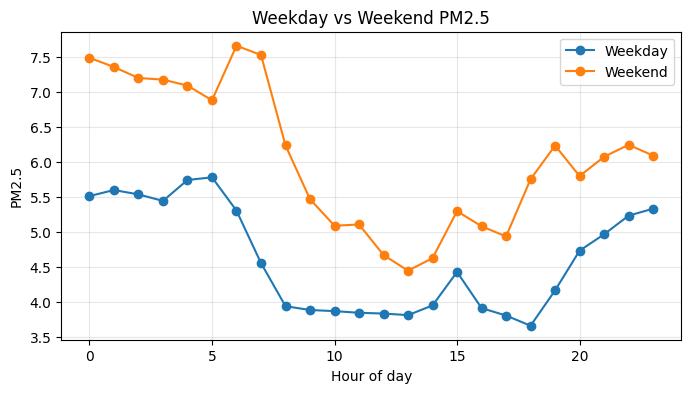

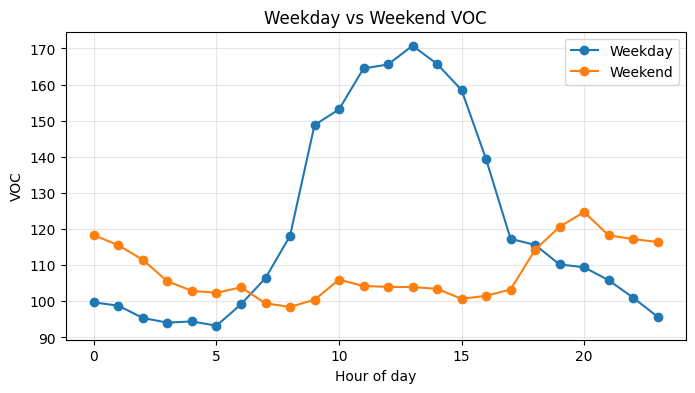

In [ ]:
import matplotlib.pyplot as plt

full_df['hour'] = full_df['timestamp'].dt.hour

weekday_weekend = full_df.groupby(['is_weekend','hour'])[['co2_gas','pm2_5','voc_aq']].mean().reset_index()

for col, label in [('co2_gas', 'CO₂'), ('pm2_5', 'PM2.5'), ('voc_aq', 'VOC')]:
    plt.figure(figsize=(8,4))
    for wknd, lbl in [(False, 'Weekday'), (True, 'Weekend')]:
        subset = weekday_weekend[weekday_weekend['is_weekend']==wknd]
        plt.plot(subset['hour'], subset[col], marker='o', label=f"{lbl}")
    plt.title(f"Weekday vs Weekend {label}")
    plt.xlabel("Hour of day")
    plt.ylabel(label)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


              co2_gas     pm2_5    voc_aq   temp_aq  humidity_aq
co2_gas      1.000000 -0.035085  0.332307  0.113035    -0.030420
pm2_5       -0.035085  1.000000 -0.017224 -0.220409     0.269319
voc_aq       0.332307 -0.017224  1.000000  0.111707     0.007686
temp_aq      0.113035 -0.220409  0.111707  1.000000    -0.824920
humidity_aq -0.030420  0.269319  0.007686 -0.824920     1.000000


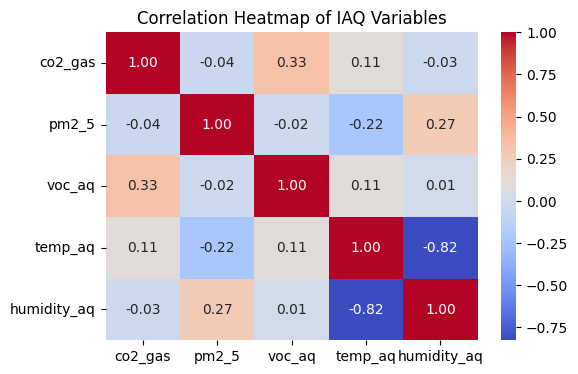

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iaq_cols = ['co2_gas','pm2_5','voc_aq','temp_aq','humidity_aq']
corr = full_df[iaq_cols].corr()
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of IAQ Variables")
plt.show()


In [ ]:
full_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/cleaned_air_quality.csv', index=False)
